In [23]:
import sys, pkgutil, subprocess
print('python executable:', sys.executable)
print('tensorflow installed:', pkgutil.find_loader('tensorflow') is not None)
print('opencv installed:', pkgutil.find_loader('cv2') is not None)
if not pkgutil.find_loader('cv2'):
    print('Installing opencv-python into this kernel...')
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'opencv-python'])
    print('Installed opencv-python; please restart the kernel and re-run this notebook.')

python executable: c:\Users\Pacific BD\anaconda3\python.exe
tensorflow installed: True
opencv installed: True


C:\Users\Pacific BD\AppData\Local\Temp\ipykernel_7188\509356172.py:3: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  print('tensorflow installed:', pkgutil.find_loader('tensorflow') is not None)
C:\Users\Pacific BD\AppData\Local\Temp\ipykernel_7188\509356172.py:4: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  print('opencv installed:', pkgutil.find_loader('cv2') is not None)
C:\Users\Pacific BD\AppData\Local\Temp\ipykernel_7188\509356172.py:5: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  if not pkgutil.find_loader('cv2'):


# CNN - Cat vs Dog Classification
### Simple Implementation

## Step 1: Import Libraries

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

## Step 2: Clean Invalid Images (Optional)

In [25]:
def clean_invalid_images(directory):
    """Remove corrupted or invalid images from dataset"""
    removed = 0
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if not os.path.isdir(folder_path):
            continue
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = cv2.imread(file_path)
                if img is None:
                    os.remove(file_path)
                    removed += 1
                    print(f"❌ Invalid image removed: {file_path}")
            except:
                os.remove(file_path)
                removed += 1
                print(f"⚠️ Problem reading: {file_path}")
    print(f"\n🧹 Cleanup Done! Removed {removed} invalid images.\n")

# Run cleanup on both train and test folders
clean_invalid_images(r"E:\Academic_Resource\5th Semister\AI Lab\Final\mahbub sir\CNN\train")
clean_invalid_images(r"E:\Academic_Resource\5th Semister\AI Lab\Final\mahbub sir\CNN\test")


🧹 Cleanup Done! Removed 0 invalid images.


🧹 Cleanup Done! Removed 0 invalid images.


🧹 Cleanup Done! Removed 0 invalid images.



## Step 3: Load Dataset

In [26]:
# Load training data
train_ds = tf.keras.utils.image_dataset_from_directory(
    r"E:\Academic_Resource\5th Semister\AI Lab\Final\mahbub sir\CNN\train",
    image_size=(256, 256),
    batch_size=32
)

# Load test data
test_ds = tf.keras.utils.image_dataset_from_directory(
    r"E:\Academic_Resource\5th Semister\AI Lab\Final\mahbub sir\CNN\test",
    image_size=(256, 256),
    batch_size=32
)

# Get class names
class_names = train_ds.class_names
print("Detected Classes:", class_names)

Found 965 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Detected Classes: ['cats', 'dogs']
Detected Classes: ['cats', 'dogs']


## Step 4: Normalize and Optimize Data

In [27]:
# Normalize images (0-255 → 0-1)
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

# Improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("✅ Data normalized and optimized!")

✅ Data normalized and optimized!


## Step 5: Build CNN Model

In [28]:
model = models.Sequential([
    layers.Input(shape=(256, 256, 3)),
    
    # Conv Block 1
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Conv Block 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Conv Block 3
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,234 (56.61 MB)

 Trainable params: 14,839,234 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Compile Model

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Step 7: Train Model

In [30]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5430 - loss: 1.0038 - val_accuracy: 0.5051 - val_loss: 0.6921
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5430 - loss: 1.0038 - val_accuracy: 0.5051 - val_loss: 0.6921
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6166 - loss: 0.6664 - val_accuracy: 0.5051 - val_loss: 0.6950
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6166 - loss: 0.6664 - val_accuracy: 0.5051 - val_loss: 0.6950
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6788 - loss: 0.6378 - val_accuracy: 0.5152 - val_loss: 0.7089
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6788 - loss: 0.6378 - val_accuracy: 0.5152 - val_loss: 0.7089
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6767 - loss: 0.6083 - val_accuracy: 0.6263 - val_loss: 0.6730
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6767 - loss: 0.6083 - val_accuracy: 0.6263 - val_los

## Step 8: Evaluate Model

In [31]:
loss, accuracy = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")
print(f"✅ Test Loss: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - accuracy: 0.6061 - loss: 1.2977
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - accuracy: 0.6061 - loss: 1.2977

✅ Test Accuracy: 60.61%
✅ Test Loss: 1.2977

✅ Test Accuracy: 60.61%
✅ Test Loss: 1.2977


## Step 9: Plot Training History

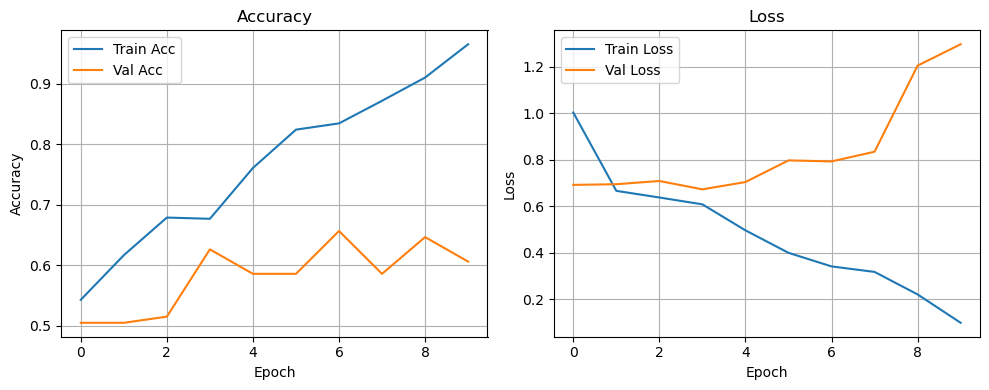

In [32]:
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Step 10: Predict Function

In [33]:
def predict_image(img_path):
    """Predict class for a single image"""
    
    if not os.path.exists(img_path):
        print(f"❌ File not found: {img_path}")
        return

    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Cannot read image: {img_path}")
        return

    # Convert to RGB and display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Testing: {os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()

    # Preprocess and predict
    img_resized = cv2.resize(img, (256, 256))
    img_input = img_resized.reshape((1, 256, 256, 3)) / 255.0

    prediction = model.predict(img_input, verbose=0)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = np.max(prediction[0]) * 100

    print(f"\n🖼️ Predicted: {predicted_class}")
    print(f"✅ Confidence: {confidence:.2f}%")

## Step 11: Test Predictions

### Test Cat Image

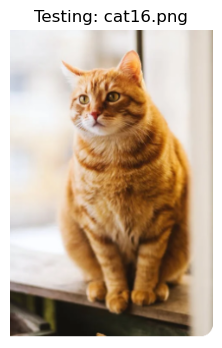


🖼️ Predicted: cats
✅ Confidence: 90.26%


In [34]:
cat_path = r"E:\Academic_Resource\5th Semister\AI Lab\Final\mahbub sir\CNN\cat16.png"
predict_image(cat_path)

### Test Dog Image

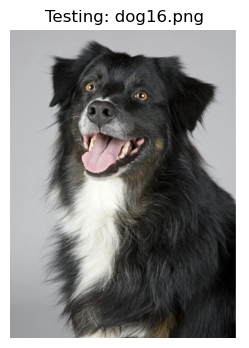


🖼️ Predicted: dogs
✅ Confidence: 84.36%


In [37]:
dog_path = r"E:\Academic_Resource\5th Semister\AI Lab\Final\mahbub sir\CNN\dog16.png"
predict_image(dog_path)

### Quick troubleshooting suggestions
If the dog image is being misclassified, consider these steps:
- Verify preprocessing: ensure the same resizing and normalization used during training (256x256 and /255.0).
- Check dataset balance: if one class has many fewer images, the model can be biased.
- Inspect misclassified examples from the confusion matrix to find patterns (occlusion, color, background).
- Try a lightweight transfer learning model (MobileNetV2) for better feature extraction, or add more epochs/data augmentation.
- If using custom images, make sure they match training conditions (lighting, orientation, scale).

In [ ]:
# Optional: Try transfer learning (MobileNetV2) for better accuracy on small datasets
# This uses the helper in cnn.py if you prefer to run training from the script instead of the notebook.
try:
    from cnn import run_full_pipeline
    print('Found local cnn.py – running a short transfer-learning smoke run is possible:')
    print('Example (terminal): .venv\Scripts\python.exe cnn.py --run --transfer --epochs 5 --save_model model.h5')
except Exception as e:
    print('Could not import run_full_pipeline from cnn.py:', e)

## Summary

**CNN Architecture:**
- Input: 256×256×3 RGB images
- 3 Convolutional blocks (32, 64, 128 filters)
- 3 MaxPooling layers (reduce size)
- Flatten + Dense layers
- Output: 2 classes (Cat, Dog)

**Steps:**
1. Clean invalid images
2. Load and normalize data
3. Build CNN model
4. Train for 10 epochs
5. Evaluate and predict

**Key Features:**
- Data augmentation with shuffle
- Performance optimization with cache/prefetch
- Simple prediction function
- Visual training history plots